In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define linear regression model

class LinearRegression(tf.keras.Model):
    def __init__(self,num_inputs, num_outputs):
        super(LinearRegression, self).__init__()
        self.W = tf.Variable(
            tf.random_normal_initializer()((num_inputs,num_outputs)))
        self.b = tf.Variable(tf.zeros(num_outputs))
        self.params = [self.W, self.b]

    def call(self, inputs):
        return tf.matmul(inputs, self.W) + self.b

In [4]:
# Create a dataset
N = 100
D = 1
K = 1
X = np.random.random((N,D)) * 2-1
w = np.random.randn(D,K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N,K) * 0.1

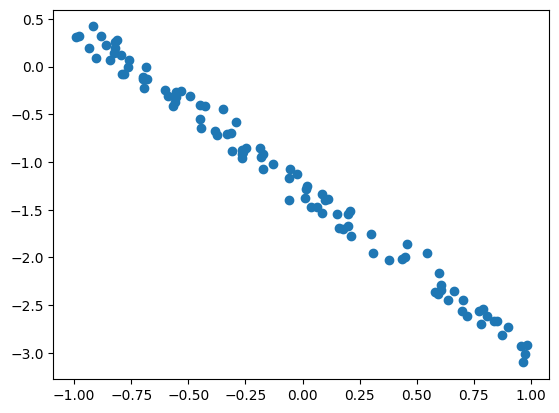

In [5]:
plt.scatter(X,Y)

In [6]:
# Cast type, otherwise Tensorflow will complain

X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [7]:
# Define the loss
def get_loss(model,inputs,targets):
    predictions = model(inputs)
    error = targets - predictions
    return tf.reduce_mean(tf.square(error))

In [11]:
# Gradient function

def get_grad(model,inputs,targets):
    with tf.GradientTape() as tape:
      #calculate the loss
        loss = get_loss(model,inputs,targets)

    # return gradient
    return tape.gradient(loss,model.params)

In [12]:
# Create and train the model
model = LinearRegression(D,K)

# Print the params before training
print("Initial params:")
print(model.W)
print(model.b)

Initial params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.07257839]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [13]:
# Store the losses here
losses = []
# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

# Run the training loop
for i in range(100):
  # Get gradients
  grads = get_grad(model, X, Y)

  # Do one step of gradient descent: param <- param  - leaarning_rate * grad
  optimizer.apply_gradients(zip(grads,model.params))

  # Store the loss
  loss = get_loss(model,X,Y)
  losses.append(loss)



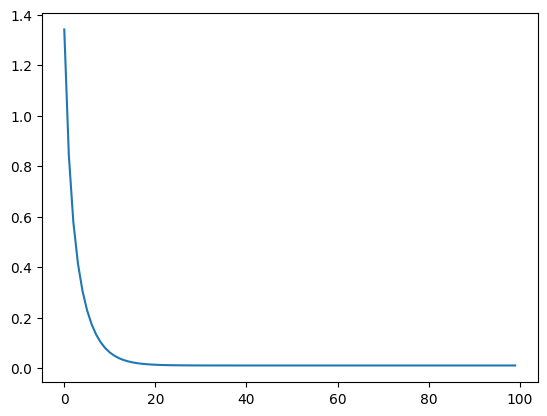

In [15]:
plt.plot(losses)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 


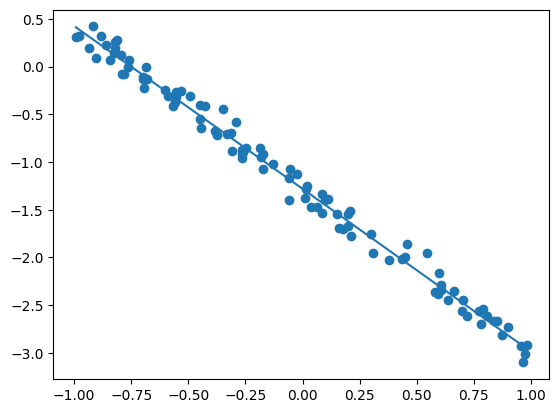

In [16]:
x_axis = np.linspace(X.min(),X.max(),100)
y_axis = model.predict(x_axis.reshape(-1,1)).flatten()

plt.scatter(X,Y)
plt.plot(x_axis,y_axis)

In [17]:
print("Predicted params:")
print(model.W)
print(model.b)

Predicted params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-1.7056677]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.2812072], dtype=float32)>


In [19]:
print("True params:")
w,b

True params:


(array([[-1.66867581]]), -1.2848051576953066)